##  <center> Выпускная квалификационная работа по курсу Data Science от МГТУ им. Н.Э. Баумана</center>
    
### <center> Работу выполнили слушатели:</center>

- `Зотова Татьяна Алексеевна`

- `Некрасов Константин Олегович`

##  Оглавление
+ [1. Установка и импорт необходимых библиотек](#Headers)
+ [2. Загрузка данных](#Headerss)
+ [3. Предобработка данных](#Headersss)
+ [3.1 Индексация музыкальной дорожки](#OLO)
+ [3.2 Параметризация](#OLOO)
+ [4. Обучение модели](#tigle)
+ [5. Нейронная сеть](#tiglee)
+ [5.1 Задаем архитектуру обучаемой сети](#set)
+ [5.2 Обучаем нейронную сеть](#set2)
+ [6. Проверка модели](#end)

<a name="Headers"></a> 
# 1. Установка и импорт необходимых библиотек


In [2]:
# !pip install librosa
# !pip3 install timit-utils==0.9.0
# !apt-get install sox ffmpeg libavutil-dev
# !pip3 install torchaudio
# !wget https://ndownloader.figshare.com/files/10256148 
# !unzip -q 10256148
# !mv data/lisa/data/timit/ data/timit/
# !rm -rf data/lisa
# !pip install playsound
# !pip install pydub
# !pip install pyaudio
# !sudo apt install build-essential portaudio19-dev python3.10-dev
# !brew install portaudio
# !brew link --overwrite portaudio
# !pip install PyAudio --upgrade
# !pip install audiomentations

"apt-get" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"mv" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [6]:
!sudo apt install build-essential portaudio19-dev python3.10-dev
!brew install portaudio
!brew link --overwrite portaudio
!pip install pyaudio

"sudo" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


"brew" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"brew" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.fftpack import fft
from scipy.signal import get_window
from audiomentations import TimeStretch

from itertools import islice
from pathlib import Path
from IPython.display import Audio

import librosa
from librosa import feature
import librosa.display
import IPython.display as ipd
import IPython
_TIMIT_PATH = 'data/timit/raw/TIMIT'

from playsound import playsound
from pydub import AudioSegment
from pydub.playback import play

import torch
# import torch as t
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F
import torchaudio

import datetime
from tqdm import tqdm
import zipfile
from zipfile import ZipFile #??

import timit_utils as tu
import timit_utils.audio_utils as au
import timit_utils.drawing_utils as du
import random
import os

#для препроцессинга
from sklearn.preprocessing import MinMaxScaler, minmax_scale, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.metrics import accuracy_score


import pyaudio
import wave
import pickle

import warnings
warnings.filterwarnings('ignore')

E:\anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
E:\anaconda\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

<a name="Headerss"></a> 
# 2. Загрузка данных


### Смотрим, какие файлы у нас лежат в zip архиве.

In [4]:
# смотрим какие размеры файлов в zip у нас есть
# также можно посмотреть, когда были изменения
zipfiles = 'TIMIT.zip'
with ZipFile(zipfiles, mode='r') as archive:
    for info in tqdm(archive.infolist()):
        print(f"Filename: {info.filename}")
        print(f"Modified: {datetime.datetime(*info.date_time)}")
        print(f"Normal size: {info.file_size} bytes")
        print(f"Compressed size: {info.compress_size} bytes")
        print("-" * 20)

 10%|███████▋                                                                  | 2668/25857 [00:00<00:00, 26424.37it/s]

Filename: README.DOC
Modified: 1990-11-01 19:51:48
Normal size: 13834 bytes
Compressed size: 4961 bytes
--------------------
Filename: DOC/
Modified: 2022-10-21 14:24:50
Normal size: 0 bytes
Compressed size: 0 bytes
--------------------
Filename: DOC/PHONCODE.DOC
Modified: 1990-10-16 10:35:04
Normal size: 5177 bytes
Compressed size: 1652 bytes
--------------------
Filename: DOC/PROMPTS.TXT
Modified: 1990-10-17 16:03:06
Normal size: 142192 bytes
Compressed size: 59884 bytes
--------------------
Filename: DOC/SPKRINFO.TXT
Modified: 1990-10-17 16:03:18
Normal size: 36889 bytes
Compressed size: 9525 bytes
--------------------
Filename: DOC/SPKRSENT.TXT
Modified: 1990-10-17 16:02:20
Normal size: 34537 bytes
Compressed size: 10880 bytes
--------------------
Filename: DOC/TESTSET.DOC
Modified: 1990-10-17 10:08:06
Normal size: 4750 bytes
Compressed size: 1829 bytes
--------------------
Filename: DOC/TIMITDIC.DOC
Modified: 1990-10-17 10:29:16
Normal size: 6229 bytes
Compressed size: 2705 bytes


 29%|█████████████████████▌                                                    | 7543/25857 [00:00<00:00, 20139.50it/s]

Modified: 1990-09-25 12:41:06
Normal size: 61 bytes
Compressed size: 62 bytes
--------------------
Filename: TEST/DR5/MLIH0/SI1813.WAV
Modified: 1990-09-25 18:14:24
Normal size: 97896 bytes
Compressed size: 68573 bytes
--------------------
Filename: TEST/DR5/MLIH0/SI1813.WRD
Modified: 1990-10-11 20:56:20
Normal size: 167 bytes
Compressed size: 110 bytes
--------------------
Filename: TEST/DR5/MLIH0/SI553.PHN
Modified: 1990-10-04 12:06:16
Normal size: 829 bytes
Compressed size: 362 bytes
--------------------
Filename: TEST/DR5/MLIH0/SI553.TXT
Modified: 1990-09-25 12:41:08
Normal size: 82 bytes
Compressed size: 78 bytes
--------------------
Filename: TEST/DR5/MLIH0/SI553.WAV
Modified: 1990-09-25 18:14:26
Normal size: 142952 bytes
Compressed size: 102752 bytes
--------------------
Filename: TEST/DR5/MLIH0/SI553.WRD
Modified: 1990-10-11 20:56:20
Normal size: 211 bytes
Compressed size: 137 bytes
--------------------
Filename: TEST/DR5/MLIH0/SX103.PHN
Modified: 1990-10-04 12:06:16
Normal siz

 46%|█████████████████████████████████▊                                       | 11973/25857 [00:00<00:00, 19178.98it/s]


Normal size: 190 bytes
Compressed size: 112 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI1832.TXT
Modified: 1990-09-25 11:20:08
Normal size: 33 bytes
Compressed size: 35 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI1832.WAV
Modified: 1990-09-25 16:05:14
Normal size: 41984 bytes
Compressed size: 29863 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI1832.WRD
Modified: 1990-10-11 20:13:08
Normal size: 66 bytes
Compressed size: 60 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI2341.PHN
Modified: 1990-10-04 12:01:28
Normal size: 248 bytes
Compressed size: 133 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI2341.TXT
Modified: 1990-09-25 11:20:08
Normal size: 38 bytes
Compressed size: 37 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI2341.WAV
Modified: 1990-09-25 16:05:14
Normal size: 49768 bytes
Compressed size: 35238 bytes
--------------------
Filename: TRAIN/DR2/MDMT0/SI2341.WRD
Modified: 1990-10-11 20:13:08
Normal size: 96 bytes
Compresse

 61%|████████████████████████████████████████████▎                            | 15702/25857 [00:00<00:00, 17170.83it/s]

Modified: 1990-09-25 16:41:08
Normal size: 106292 bytes
Compressed size: 67284 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SA2.WRD
Modified: 1990-10-11 20:28:02
Normal size: 159 bytes
Compressed size: 105 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SI1132.PHN
Modified: 1990-10-04 12:03:12
Normal size: 602 bytes
Compressed size: 284 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SI1132.TXT
Modified: 1990-09-25 11:48:22
Normal size: 62 bytes
Compressed size: 64 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SI1132.WAV
Modified: 1990-09-25 16:41:10
Normal size: 116122 bytes
Compressed size: 81094 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SI1132.WRD
Modified: 1990-10-11 20:28:02
Normal size: 170 bytes
Compressed size: 115 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SI1762.PHN
Modified: 1990-10-04 12:03:12
Normal size: 541 bytes
Compressed size: 257 bytes
--------------------
Filename: TRAIN/DR3/MFMC0/SI1762.TXT
Modified: 1990-09-25 11:48:22

 80%|██████████████████████████████████████████████████████████▍              | 20692/25857 [00:01<00:00, 15723.11it/s]

Filename: TRAIN/DR4/MTRC0/SX363.TXT
Modified: 1988-12-08 12:33:08
Normal size: 60 bytes
Compressed size: 57 bytes
--------------------
Filename: TRAIN/DR4/MTRC0/SX363.WAV
Modified: 1990-09-25 20:09:14
Normal size: 82944 bytes
Compressed size: 60265 bytes
--------------------
Filename: TRAIN/DR4/MTRC0/SX363.WRD
Modified: 1990-10-11 20:52:14
Normal size: 154 bytes
Compressed size: 103 bytes
--------------------
Filename: TRAIN/DR4/MTRC0/SX93.PHN
Modified: 1990-10-04 11:58:20
Normal size: 348 bytes
Compressed size: 180 bytes
--------------------
Filename: TRAIN/DR4/MTRC0/SX93.TXT
Modified: 1988-12-08 12:33:12
Normal size: 42 bytes
Compressed size: 44 bytes
--------------------
Filename: TRAIN/DR4/MTRC0/SX93.WAV
Modified: 1990-09-25 20:09:16
Normal size: 59392 bytes
Compressed size: 40271 bytes
--------------------
Filename: TRAIN/DR4/MTRC0/SX93.WRD
Modified: 1990-10-11 20:52:14
Normal size: 110 bytes
Compressed size: 83 bytes
--------------------
Filename: TRAIN/DR4/MTRT0/
Modified: 2006-

 95%|█████████████████████████████████████████████████████████████████████▏   | 24509/25857 [00:01<00:00, 17354.93it/s]IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# смотрим какие вообще файлы лежат в zip
archive = 'TIMIT.zip'
zip_file = ZipFile(archive, mode='r')
[text_file.filename for text_file in zip_file.infolist()]

['README.DOC',
 'DOC/',
 'DOC/PHONCODE.DOC',
 'DOC/PROMPTS.TXT',
 'DOC/SPKRINFO.TXT',
 'DOC/SPKRSENT.TXT',
 'DOC/TESTSET.DOC',
 'DOC/TIMITDIC.DOC',
 'DOC/TIMITDIC.TXT',
 'TEST/',
 'TEST/DR1/',
 'TEST/DR1/FAKS0/',
 'TEST/DR1/FAKS0/SA1.PHN',
 'TEST/DR1/FAKS0/SA1.TXT',
 'TEST/DR1/FAKS0/SA1.WAV',
 'TEST/DR1/FAKS0/SA1.WRD',
 'TEST/DR1/FAKS0/SA2.PHN',
 'TEST/DR1/FAKS0/SA2.TXT',
 'TEST/DR1/FAKS0/SA2.WAV',
 'TEST/DR1/FAKS0/SA2.WRD',
 'TEST/DR1/FAKS0/SI1573.PHN',
 'TEST/DR1/FAKS0/SI1573.TXT',
 'TEST/DR1/FAKS0/SI1573.WAV',
 'TEST/DR1/FAKS0/SI1573.WRD',
 'TEST/DR1/FAKS0/SI2203.PHN',
 'TEST/DR1/FAKS0/SI2203.TXT',
 'TEST/DR1/FAKS0/SI2203.WAV',
 'TEST/DR1/FAKS0/SI2203.WRD',
 'TEST/DR1/FAKS0/SI943.PHN',
 'TEST/DR1/FAKS0/SI943.TXT',
 'TEST/DR1/FAKS0/SI943.WAV',
 'TEST/DR1/FAKS0/SI943.WRD',
 'TEST/DR1/FAKS0/SX133.PHN',
 'TEST/DR1/FAKS0/SX133.TXT',
 'TEST/DR1/FAKS0/SX133.WAV',
 'TEST/DR1/FAKS0/SX133.WRD',
 'TEST/DR1/FAKS0/SX223.PHN',
 'TEST/DR1/FAKS0/SX223.TXT',
 'TEST/DR1/FAKS0/SX223.WAV',
 'TEST/DR1/F

In [6]:
# извлекаем файлы из zip с помощью функции extractall
path = 'TIMIT.zip'
z = zipfile.ZipFile(path, 'r') 
z.extractall()
# all_files = 'OKC SKC JP MG'.split()
z.close()

In [7]:
# считываем айдиофайл. 
clip, sample_rate = librosa.load('TRAIN/DR1/FCJF0/SI648.wav')

print('Sample Rate   {} Hz'.format(sample_rate))
print('Clip Length   {:3.2f} seconds'.format(len(clip)/sample_rate))

Sample Rate   22050 Hz
Clip Length   3.62 seconds


<a name="Headersss"></a> 
# 3. Предобработка данных

<a name="OLO"></a> 
### 3.1 Индексация музыкальной дорожки

In [8]:
# т.к. данные у нас чистые, целенаправлено засорим наш аудио файл
# в данном случае применил ускорение/замедление аудио

augment = TimeStretch(min_rate=0.8, max_rate=1.5, p=1) 
augmented_data = augment(clip, sample_rate=sample_rate)

display(Audio(augmented_data, rate=sample_rate))

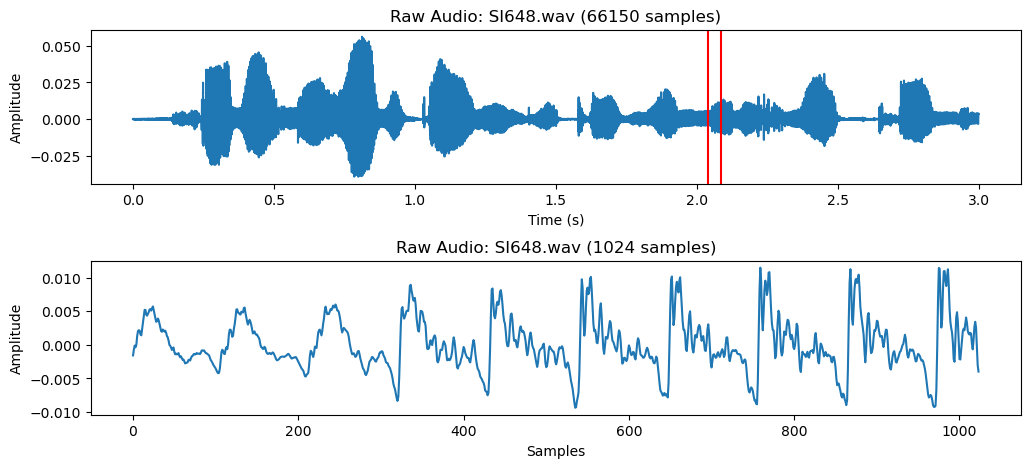

In [9]:
#посмотрим на параметры качества записи. 
three_seconds = sample_rate * 3 #возьмем только 3 секунды сигнала
clip = clip[:three_seconds]

timesteps = np.arange(len(clip)) / sample_rate  

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

# нарисуем изображение аудиосигнала
ax[0].plot(timesteps, clip)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio: {} ({} samples)'.format("SI648.wav", len(clip)))


n_fft = 1024 # длина в семплах небольшого отрезка
start = 45000 # момент начала отрезка 
x = clip[start:start+n_fft]

# покажем место отрезка
ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

# сигнал в отрезке на отдельном графике 
ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio: {} ({} samples)'.format("SI648.wav", len(x)));

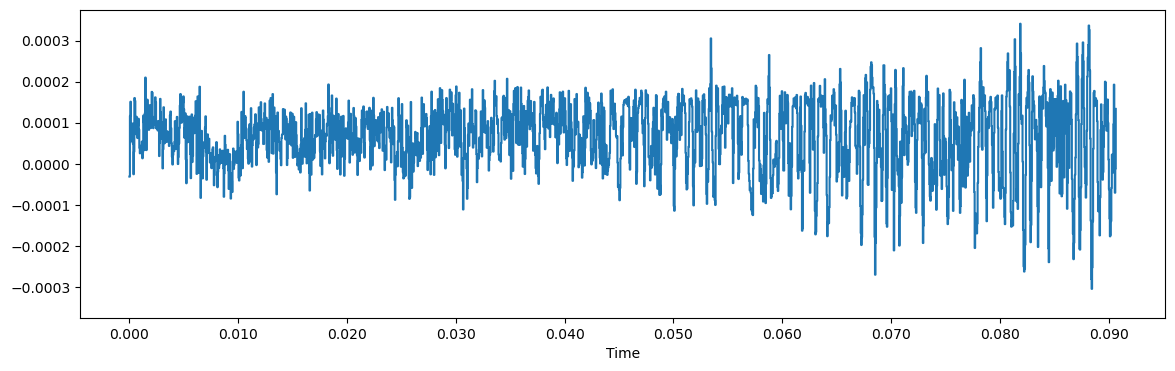

In [10]:
plt.figure(figsize = (14,4))
librosa.display.waveshow(clip[:2000], sr=sample_rate)
plt.show()

<a name="OLOO"></a> 
### 3.2 Параметризация

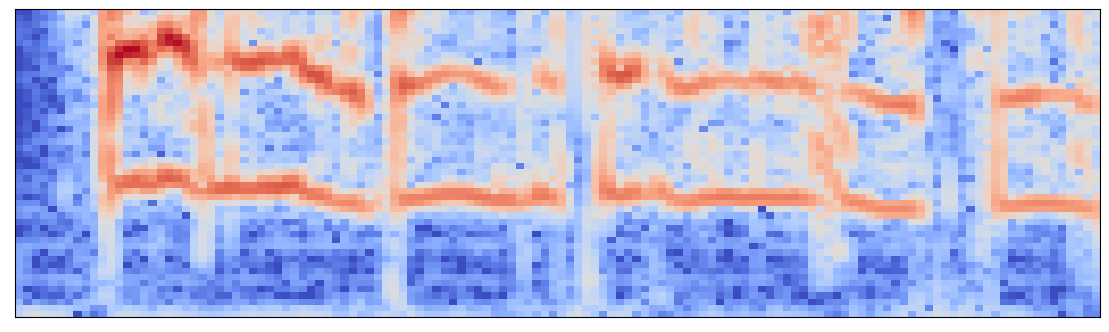

In [11]:
# Смотрим на спектрограмму

X = librosa.stft(clip)

Xdb = librosa.amplitude_to_db(abs(X)) #перевод в Дб
plt.figure(figsize = (14,4))
librosa.display.specshow(Xdb[:50], sr = sample_rate)

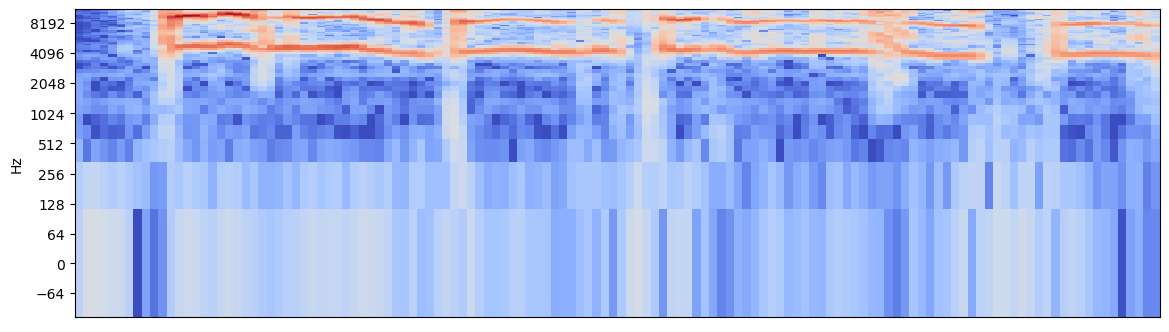

In [12]:
#Спектрограмма логарифмированная
plt.figure(figsize = (14,4))
librosa.display.specshow(Xdb[:50], sr = sample_rate, y_axis= 'log')

(130,)


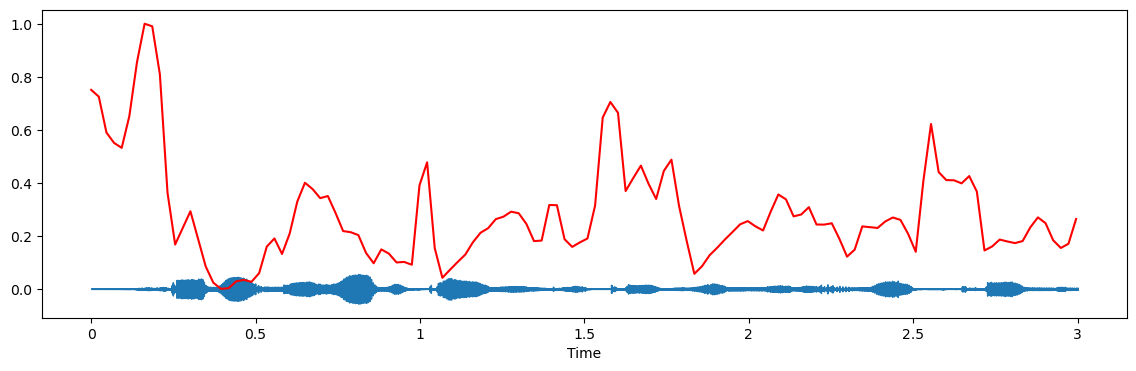

In [13]:
#спектральный центроид

spectral_centroid = librosa.feature.spectral_centroid(clip , sample_rate)[0]
print(spectral_centroid.shape)
#время для отображения
time_ = range(len(spectral_centroid))
t = librosa.frames_to_time(time_)
#функция для нормализации спектрального центроида
def get_normalize(spec_centr, axis = 0):
    return minmax_scale(spec_centr, axis = axis)
plt.figure(figsize = (14,4))
librosa.display.waveshow(clip , sample_rate)
plt.plot(t, get_normalize(spectral_centroid), color = 'r')
plt.show()

Чтобы получить признаки из аудиосигнала, которые можно подавать на классификатор, вычислим значения мел-кепстральных коэффициентов для данного сигнала. Обобщенный алгоритм получения мел-кепстральных коэффициентов можно представить так:

1. Разделить исходный сигнал на фреймы (небольшие отрезки)
2. Умножить сигнал в фрейме на оконную функцию
3. Использовать быстрое преобразование Фурье в выбранном окне
4. Вычислить периодограмму
5. Вычислить блок мел-фильтров
6. Логарифмировать полученные значения
7. Применяем дискретное косинусное преобразование

Шаги 1 и 2. Применим оконную функцию Хэмминга к небольшому отрезку аудиосигнала. Необходимо разделить исходный сигнал на фреймы. Размер фрейма обычно выбирается от 20 до 40 мс, так как считается, что речевой сигнал на этом промежутке не сильно меняется.

Речевой сигнал конечен и не является периодическим, поэтому из-за разрывов на его концах при применении преобразования Фурье проявляется эффект утечки. Для того, чтобы снизить его влияние на результат, каждый кадр умножается на оконную функцию Хемминга.

Text(0.5, 0, 'Сигнал, умноженный на окно Хэмминга')

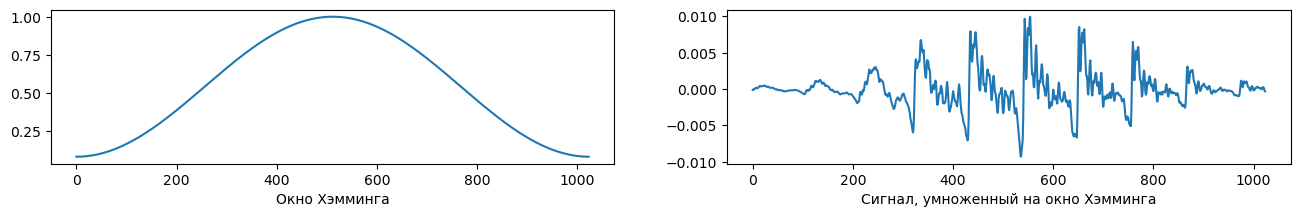

In [14]:
x = clip[start:start+n_fft]
window = get_window('hamming', n_fft)
wx = x * window # Значения сигнала умножаются на оконную функцию

fig, ax = plt.subplots(1, 2, figsize=(16, 2))
ax[0].plot(window)
ax[0].set_xlabel('Окно Хэмминга')
ax[1].plot(wx);
ax[1].set_xlabel('Сигнал, умноженный на окно Хэмминга')

3. Используем быстрое преобразование Фурье в выбранном окне

In [15]:
X = fft(x, n_fft)
X.shape, X.dtype

((1024,), dtype('complex64'))

4. Вычисляем периодограмму

((513,), dtype('float32'))

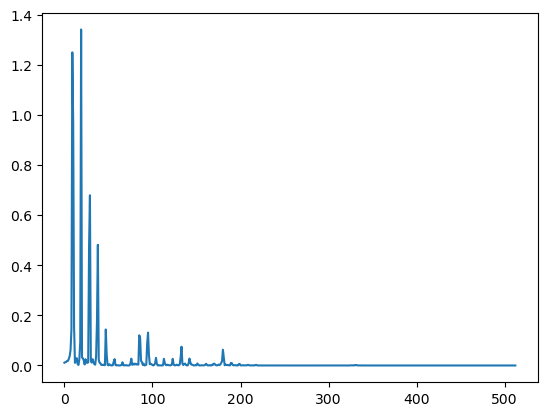

In [16]:
# Мы используем только первые (n_fft/2)+1 отсчетов на выходе, вторая половина изыточна (отрицательные частоты нас не интересуют)
X = X[:n_fft//2+1]

# вычисляем периодограмму
X_magnitude = np.abs(X ** 2) 

plt.plot(X_magnitude);
X_magnitude.shape, X_magnitude.dtype

5. Вычисляем блок мел-фильтров. Для этого треугольные фильтры (от 20 до 40) умножаются на периодограмму и суммируются. В результате мы получим энергии набора фильтров. Фильтры cобираются в области низких частот, обеспечивая более высокое "разрешение" там, где это необходимо для распознавания.

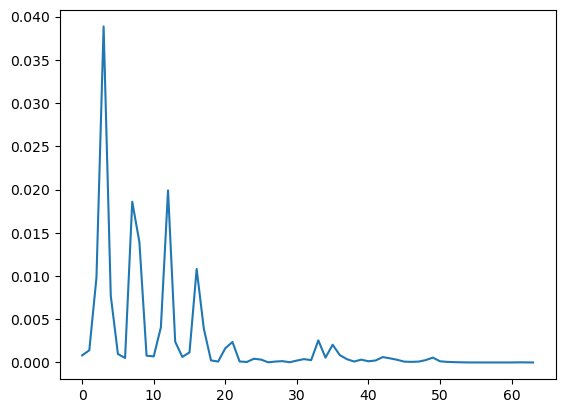

In [17]:
# Количество треугольных мел-фильтров
n_mels = 64
fmin = 20           
fmax = 8000
mel_basis = librosa.filters.mel(sample_rate, n_fft=n_fft,
                                    n_mels=n_mels, fmin=fmin, fmax=fmax)
mel_spectrogram = np.dot(mel_basis, X_magnitude)
plt.plot(mel_spectrogram);

6. Логарифмируем полученные значения.

Это также мотивируется человеческим слухом: мы не слышим громкость в линейном масштабе. Обычно, чтобы удвоить воспринимаемую громкость звука, нам нужно затратить в 8 раз больше энергии. Это означает, что большие колебания энергии могут звучать не так уж и по-другому, если звук с самого начала громкий. Эта операция сжатия делает наши функции более близкими к тому, что на самом деле слышат люди.

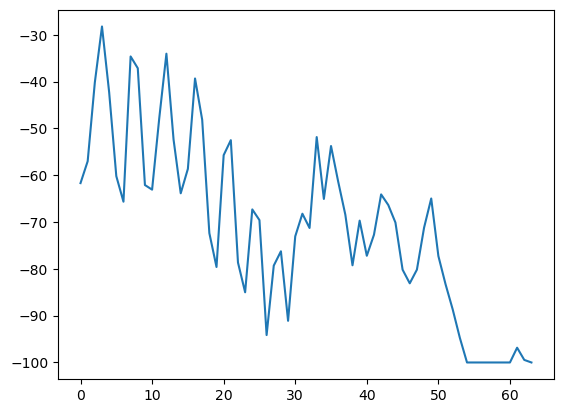

In [18]:
# Мы слышим громкость в децибелах (логарифмируем полученные значения)
X_magnitude_db = librosa.amplitude_to_db(mel_spectrogram)

plt.plot(X_magnitude_db);

Если применить шаги 1-6 ко всему сигналу, а не к одному окну, то получим следующую картину:

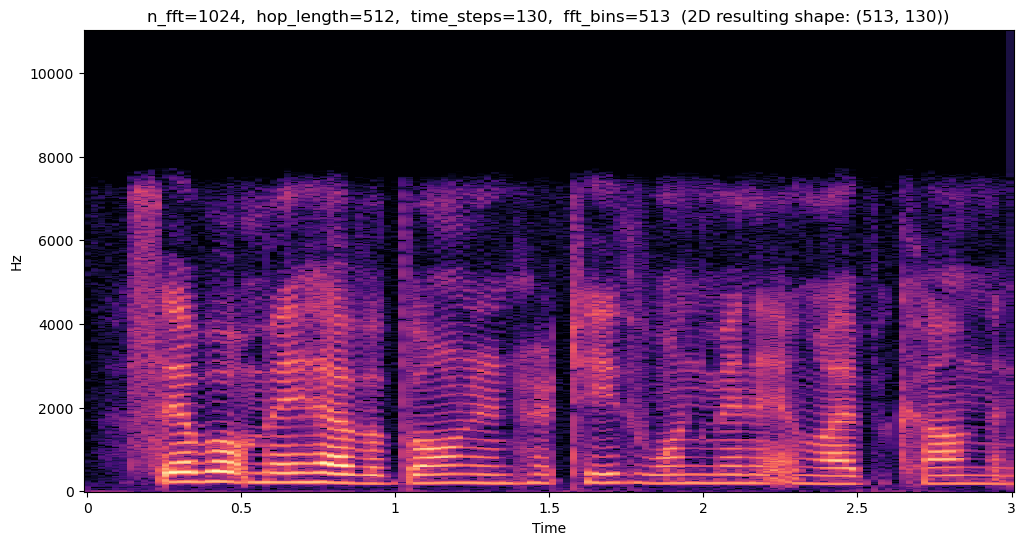

In [19]:
hop_length = 512
stft = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(stft_magnitude_db, x_axis='time', y_axis='linear', 
                         sr=sample_rate, hop_length=hop_length)

title = 'n_fft={},  hop_length={},  time_steps={},  fft_bins={}  (2D resulting shape: {})'
plt.title(title.format(n_fft, hop_length, 
                       stft_magnitude_db.shape[1], 
                       stft_magnitude_db.shape[0], 
                       stft_magnitude_db.shape));

7. Применяем дискретное косинусное преобразование

Text(0.5, 1.0, 'n_mels=64, fmin=20, fmax=8000')

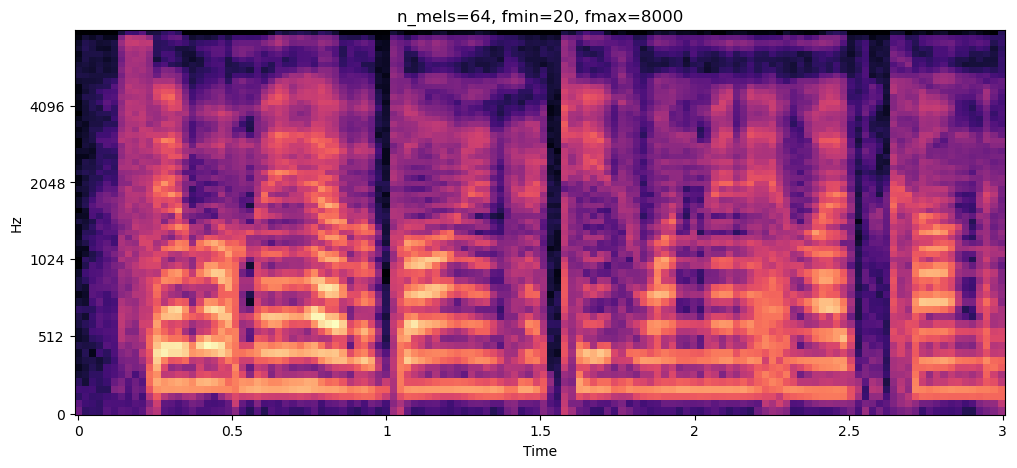

In [20]:
# Количество треугольных мел-фильтров
n_mels = 64
fmin = 20           
fmax = 8000

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

mel_spec = librosa.feature.melspectrogram(clip, n_fft=n_fft, hop_length=hop_length, #clip - массив отсчетов аудиосигнала, n_fft - количество отсчетов в окне,
                                                                                    #hop_length - количество отсчетов для перемещения окна
                                          n_mels=n_mels, sr=sample_rate, power=1.0, #n_mels - количество мел-фильтров, sr - частота дискретизации, 
                                                                                    #power - степень, в которую возводятся амплитуды спектра
                                          fmin=fmin, fmax=fmax)                     #fmin, fmax - минимальная, максимальная частота, используемые в расчетах
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, x_axis='time',  y_axis='mel', 
                         sr=sample_rate, hop_length=hop_length, 
                         fmin=fmin, fmax=fmax) #, ax=ax[1]
                         
ax.set_title('n_mels=64, fmin=20, fmax=8000')


# Корпус:

### Загрузим наши данные, содержащиеся в наборе TIMIT в корпус. Он содержит два подкорпуса, обучающую и тестовую выборку.

In [21]:
DATA_PATH = 'TIMIT'
corpus = tu.Corpus(DATA_PATH)
train = corpus.train
test = corpus.test
corpus.train, corpus.test

(<timit_utils.core.SubCorpus at 0x1caec352e80>,
 <timit_utils.core.SubCorpus at 0x1caec352e50>)

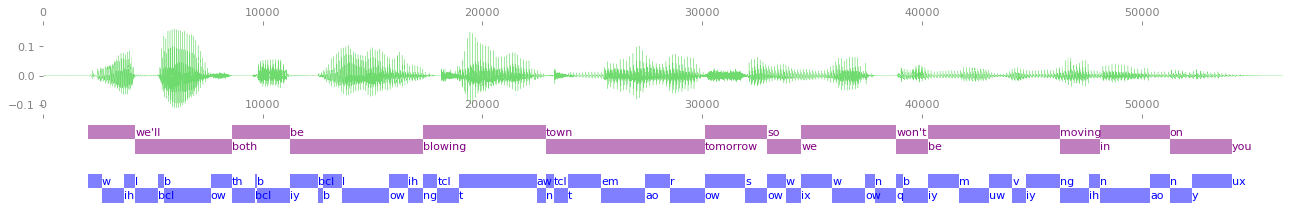

In [22]:
# Отобразим аудио предложения, слова и транскрипций фонем
sentence = corpus.train.sentences_by_phone_df('uw').sentence[0]
du.DrawVerticalPanels([du.AudioPanel(sentence.raw_audio, show_x_axis=True),
                       du.WordsPanel(sentence.words_df, sentence.raw_audio.shape[0], show_x_axis=True),
                       du.PhonesPanel(sentence.phones_df, sentence.raw_audio.shape[0])
                      ])
IPython.display.Audio(sentence.raw_audio,rate=16000)

## Создаем DataFrames

In [23]:
# Создадим Датафрейм, содержащий количество слов, произнесенных всеми людьми.
twtu_df = train.words_to_usages_df
twtu_df.head()

'em  a  abbreviate  abides  ability  able  ably  abolish  aborigine  \
ABC0 (M)    0  2           0       0        0     0     0        1          0   
ADC0 (M)    0  3           0       0        0     0     0        0          0   
ADD0 (M)    0  1           0       0        0     0     0        0          0   
AEB0 (M)    0  1           0       0        0     0     0        0          0   
AEM0 (F)    0  3           0       0        0     0     0        0          0   

          aborigines  ...  zebras  zig  zinnias  zippers  zircons  zombie  \
ABC0 (M)           0  ...       0    0        0        0        0       0   
ADC0 (M)           0  ...       0    0        0        0        0       0   
ADD0 (M)           0  ...       0    0        0        0        0       0   
AEB0 (M)           0  ...       0    0        0        0        0       0   
AEM0 (F)           0  ...       0    0        0        0        0       0   

          zones  zoo  zoologist  zoos  
ABC0 (M)      0    0          0     0  
ADC0 (M)      0    0          0     0  
ADD0 (M)      0    0          0     0  
AEB0 (M)      0    0          0     0  
AEM0 (F)      0    0          0     0  

[5 rows x 4893 columns]

In [24]:
# смотрим, какие слова встречаются в наших данных.
twtu_df.columns.tolist()

["'em",
 'a',
 'abbreviate',
 'abides',
 'ability',
 'able',
 'ably',
 'abolish',
 'aborigine',
 'aborigines',
 'about',
 'above',
 'abruptly',
 'absent',
 'absolution',
 'absorption',
 'absurd',
 'absurdly',
 'academic',
 'accelerometer',
 'accelerometers',
 'accept',
 'accepted',
 'accident',
 'acclaim',
 'accommodate',
 'accomplish',
 'accomplishments',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accurate',
 'accusingly',
 'ace',
 'achieve',
 'acknowledged',
 'acquiescence',
 'acquire',
 'acres',
 'across',
 'act',
 'action',
 'actions',
 'activated',
 'activities',
 'activity',
 'actor',
 'actors',
 'acts',
 'actual',
 'actually',
 'adage',
 'adaptations',
 'add',
 'added',
 'addition',
 'address',
 'addressed',
 'adequate',
 'adhesive',
 'adjourned',
 'adjustable',
 'administration',
 'administrative',
 'admire',
 'admitted',
 'adopted',
 'adult',
 'adulterers',
 'adults',
 'advance',
 'advanced',
 'advances',
 'advantage',
 'advantages',
 'adventure',
 'advertising',

In [25]:
#twtu_df['bank']

In [26]:
#проверим на пропуски столбец "a"
twtu_df['a'].isnull().sum()

0

Проверка была необходима в связи с тем, чтобы в дальнейшем на основании данной строки, мы сможем делать анализ на основании всех людей, которые употребяли в своей речи букву "a".

In [27]:
# Создадим Датафрейм, содержащий количество фонем, произнесенных всеми людьми.
tptu_df = train.phones_to_usages_df
tptu_df.head()

aa  ae  ah  ao  aw  ax  ax-h  axr  ay  b  ...  tcl  th  uh  uw  ux  \
ABC0 (M)   8  12   3   4   1   1     2   10   1  6  ...   10   1   2   0   7   
ADC0 (M)   6  11   6   7   1   6     1    1   7  7  ...   13   1   1   0   6   
ADD0 (M)   7  11   3   8   2   2     1    2   5  7  ...   18   1   0   2   8   
AEB0 (M)   9   8   7  10   0   5     3    7   2  2  ...    9   2   0   1   4   
AEM0 (F)   6  12   2   9   1   6     0    6   4  6  ...   10   5   2   3   5   

          v   w  y   z  zh  
ABC0 (M)  7   5  4  12   1  
ADC0 (M)  6   6  4   8   0  
ADD0 (M)  4   8  5   6   0  
AEB0 (M)  3   5  2   8   0  
AEM0 (F)  2  10  4   8   0  

[5 rows x 60 columns]

In [28]:
# Учитывая любое слово, получим срез данных, 
# содержащий всех людей, которые сказали это слово, 
# соответствующие предложения и подсчеты в этом предложении.

tsbw_df = train.sentences_by_word_df('a')
tsbw_df.head(2)

sentence count
ABC0 (M)    SX241     1
ABC0 (M)     SX61     1

In [29]:
# Тоже самое делаем и с фонемами

tsbp_df = train.sentences_by_phone_df('aa')
tsbp_df.head()

sentence count
ABC0 (M)      SA1     2
ABC0 (M)   SI1620     1
ABC0 (M)   SI2041     1
ABC0 (M)    SI781     1
ABC0 (M)    SX331     1

In [30]:
# Регион и Люди.
r0 = train.region_by_index(2)
p0 = train.person_by_index(1)
print(f'Регион: {r0}')
print(f'Люди: {p0}')

Регион: DR3
Люди: ADC0 (M)


In [31]:
# Люди по региону или subcorpus
rp0 = train.region_by_index(0).person_by_index(0)
rp0, rp0.name

(<timit_utils.core.Person at 0x1caec369d90>, 'CJF0')

In [32]:
# Посмотрим на предложения в зависимости от людей, региона или субкорпуса
p0.sentences

{'SA1': <timit_utils.core.Sentence at 0x1cae844ccd0>,
 'SA2': <timit_utils.core.Sentence at 0x1cae844caf0>,
 'SI1367': <timit_utils.core.Sentence at 0x1cae8447c40>,
 'SI1997': <timit_utils.core.Sentence at 0x1cae8447790>,
 'SI737': <timit_utils.core.Sentence at 0x1cae8447490>,
 'SX107': <timit_utils.core.Sentence at 0x1cae8447670>,
 'SX17': <timit_utils.core.Sentence at 0x1cae8447310>,
 'SX197': <timit_utils.core.Sentence at 0x1cae8447ac0>,
 'SX287': <timit_utils.core.Sentence at 0x1cae8447400>,
 'SX377': <timit_utils.core.Sentence at 0x1cae8447370>}

In [33]:
s0 = p0.sentence_by_index(0)
s0, s0.name

(<timit_utils.core.Sentence at 0x1cae844ccd0>, 'SA1')

In [34]:
s0 = train.sentences_by_phone_df('uw').sentence[0]
s0, s0.name

(<timit_utils.core.Sentence at 0x1caed635370>, 'SI1798')

In [35]:
# посмотрим на срез данных слов и фонем и на их количество.
s0.words_df.head(5)

start    end
we'll     2040   4200
both      4200   8600
be        8600  11240
blowing  11240  17320
town     17320  22892

In [36]:
s0.phones_df.head()

start   end
w     2040  2680
ih    2680  3693
l     3693  4200
bcl   4200  5240
b     5240  5514

In [37]:
swc = s0.word_counts
spc = s0.phone_counts

print(swc)
print(spc)

Counter({'be': 2, "we'll": 1, 'both': 1, 'blowing': 1, 'town': 1, 'tomorrow': 1, 'so': 1, 'we': 1, "won't": 1, 'moving': 1, 'in': 1, 'on': 1, 'you': 1})
Counter({'ow': 5, 'b': 4, 'n': 4, 'w': 3, 'ih': 3, 'bcl': 3, 'iy': 3, 'l': 2, 'ng': 2, 'tcl': 2, 't': 2, 'ao': 2, 'th': 1, 'aw': 1, 'em': 1, 'r': 1, 's': 1, 'ix': 1, 'q': 1, 'm': 1, 'uw': 1, 'v': 1, 'y': 1, 'ux': 1})


In [38]:
features = au.audio_features(s0.raw_audio, s0.sample_rate)
features.shape

(3503, 66)

In [39]:
# Можно посмотреть ключевые характеристики данных. 

In [40]:
gained_padded_audio = au.audio_gained(au.audio_zero_padded(8000, s0.raw_audio, 8000), 1.0)
audio_features = au.audio_features(gained_padded_audio, s0.sample_rate)
sampled_audio = au.resampled_audio(s0.raw_audio, 
                       sample_rate = s0.sample_rate, 
                       pad = 8000, 
                       to_sample_rate = 1000)
print(gained_padded_audio.shape, sampled_audio.shape, audio_features.shape)

(72423,) (4518,) (4503, 66)


In [41]:
# Также можно реализовать уменьшенные слова и 
# последовательность фонем
sentence_phones_input = au.resampled_phones_df(s0.phones_df, s0.sample_rate, left_pad=8000)
sentence_words_input = au.resampled_phones_df(s0.words_df, s0.sample_rate, left_pad=8000)

# Изобразим все на графиках

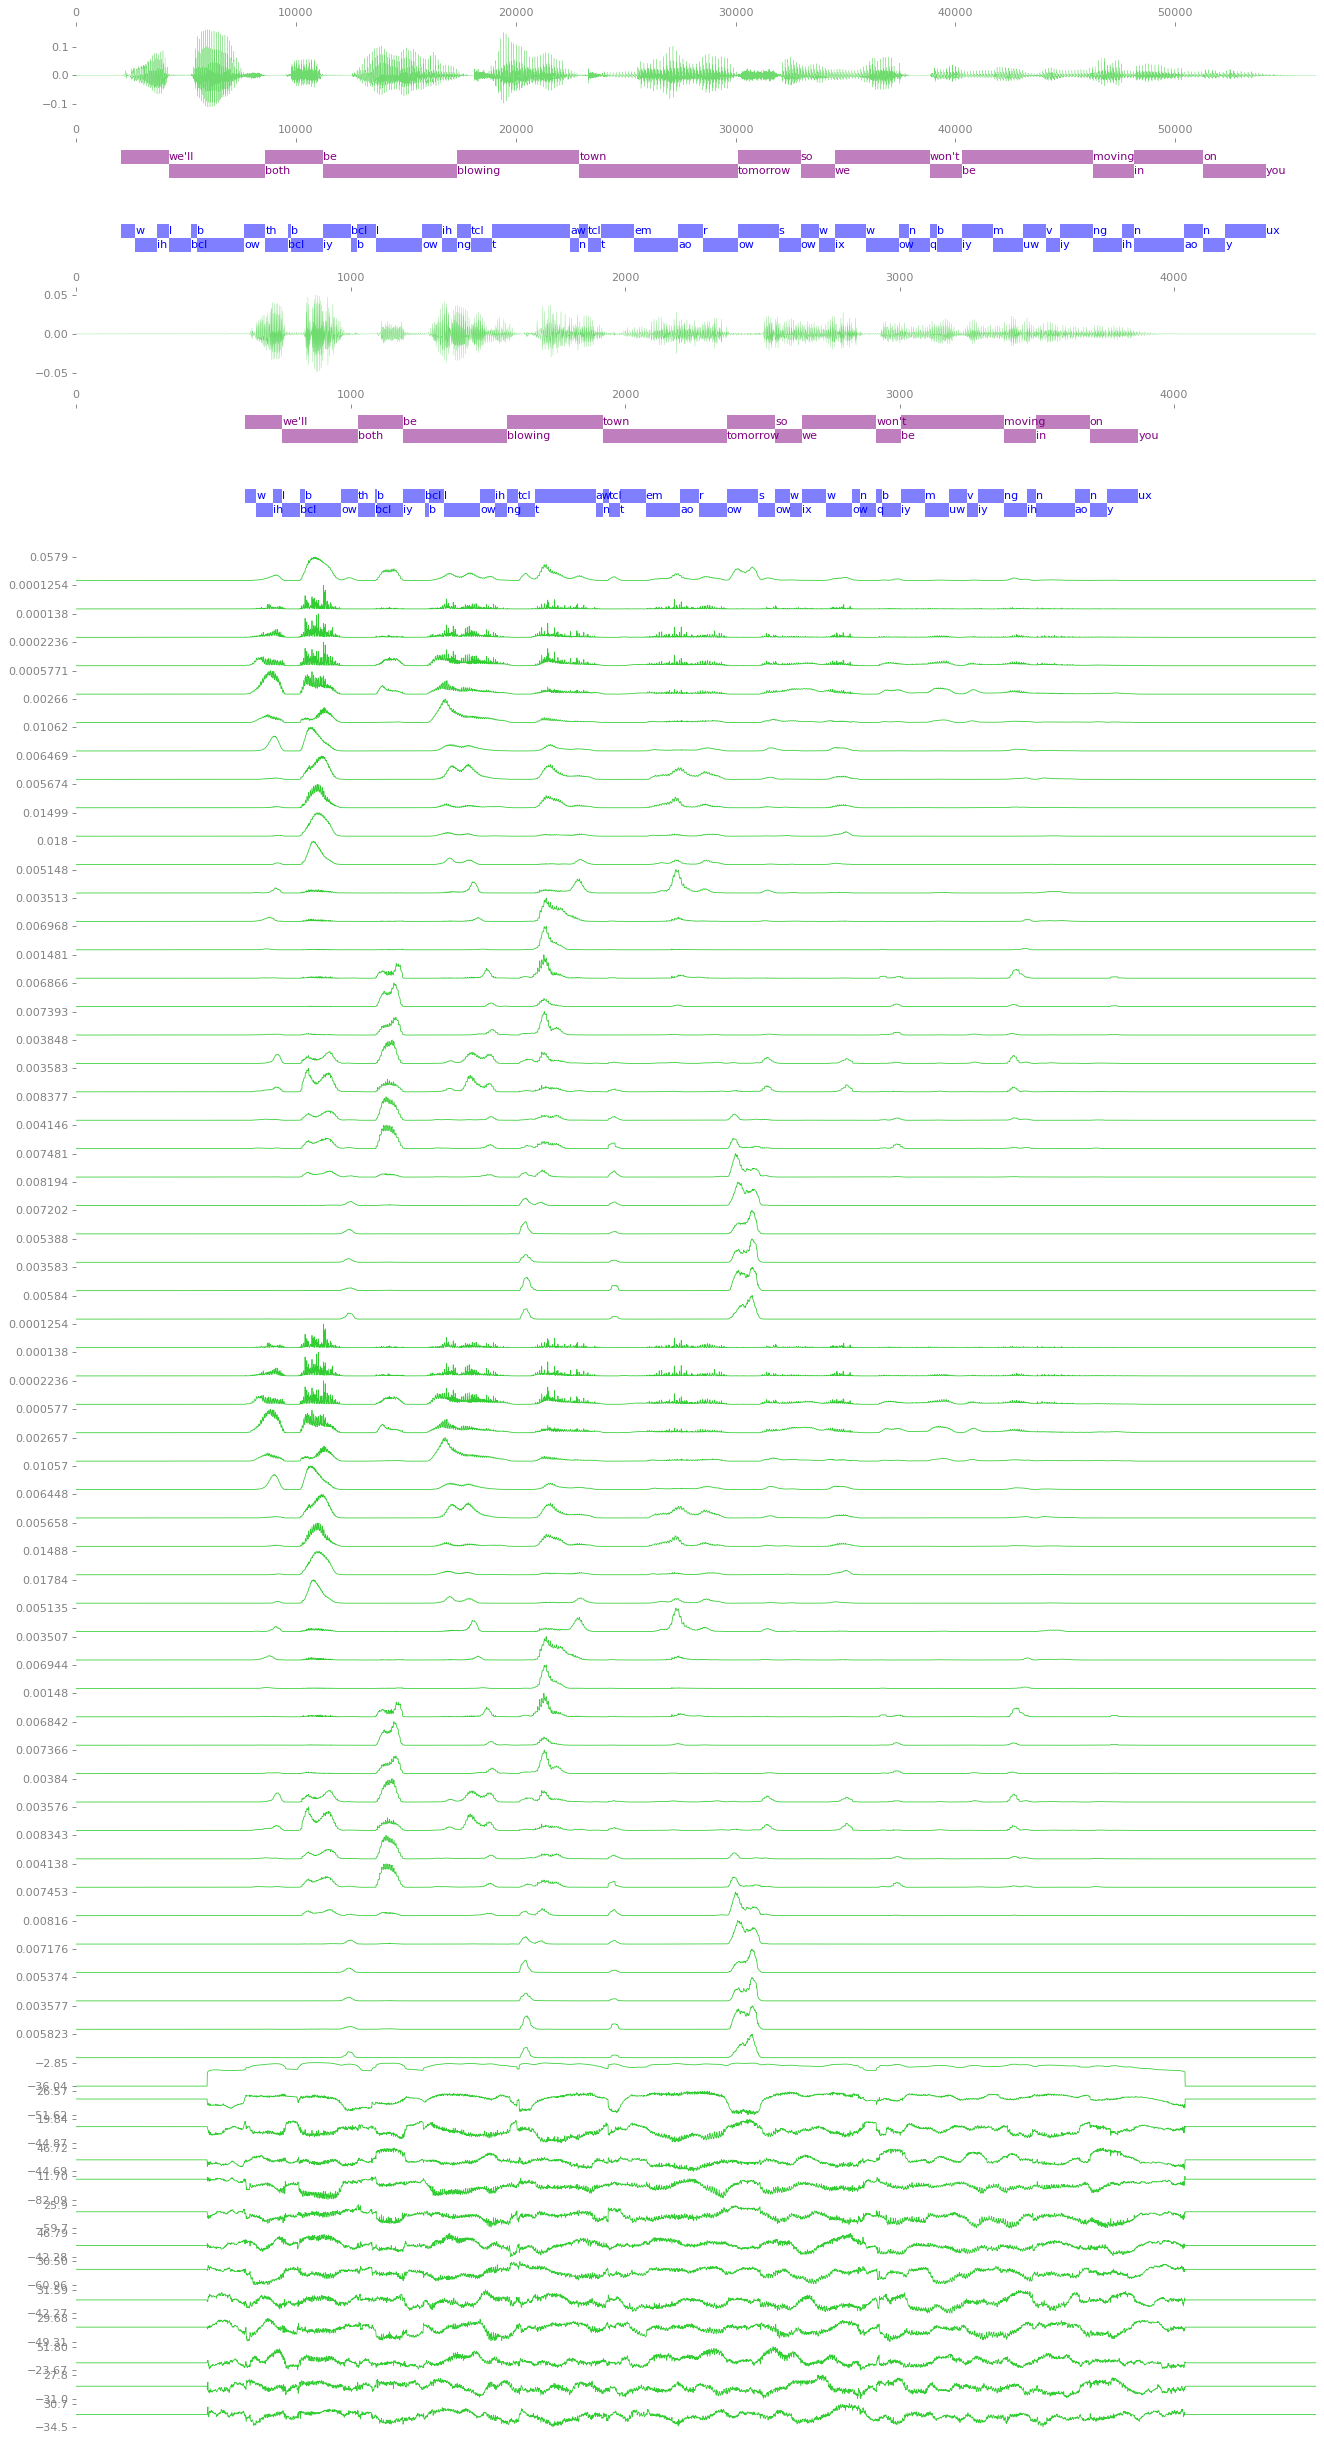

In [42]:
du.DrawVerticalPanels([
    # Необработанный звук
    du.AudioPanel(s0.raw_audio, show_x_axis=True), 
    # Транскрипция необработанных слов
    du.WordsPanel(s0.words_df, s0.raw_audio.shape[0], show_x_axis=True), 
    # Необработанные транскрипции фонем
    du.PhonesPanel(s0.phones_df, s0.raw_audio.shape[0]),
    # Звук с пониженной частотой дискретизации
    du.AudioPanel(sampled_audio, show_x_axis=True),
    # Транскрипция слов с пониженной частотой дискретизации
    du.WordsPanel(sentence_words_input, sampled_audio.shape[0], show_x_axis=True),
    # Транскрипция фонем с пониженной дискретизацией
    du.PhonesPanel(sentence_phones_input, sampled_audio.shape[0]),
    # Мел фичи
    du.SignalsPanel(audio_features)
                      ])

Проведенный анализ позволяет увидеть частоты слов и фонем, которые встречаются у людей. Этот вывод может пригодится в дальнейшем, для построения нейронной сети, которая будет определять кому принадлежит голос женщине или мужчине.

<a name="tigle"></a> 
# 4. Обучение модели

### Обучим классификатор пола по голосу.

Для этого зададим класс timit_dataloader, который позволяет извлекать метки пола, возраста, идентификатор диктора, а также задает методы предобработки аудиосигнала.

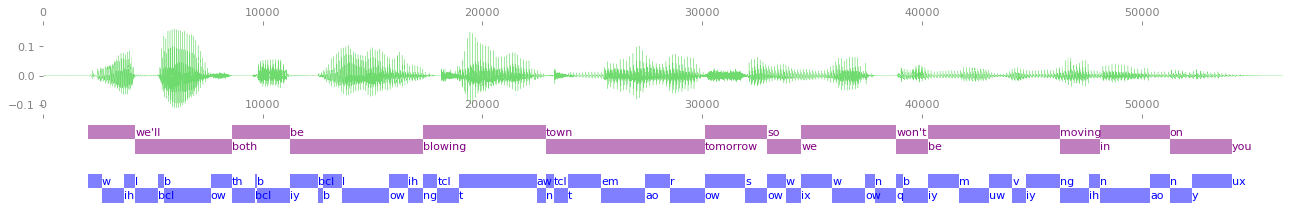

In [43]:
DATA_PATH = 'TIMIT'
corpus = tu.Corpus(DATA_PATH)
sentence = corpus.train.sentences_by_phone_df('uw').sentence[0]
du.DrawVerticalPanels([du.AudioPanel(sentence.raw_audio, show_x_axis=True),
                       du.WordsPanel(sentence.words_df, sentence.raw_audio.shape[0], show_x_axis=True),
                       du.PhonesPanel(sentence.phones_df, sentence.raw_audio.shape[0])
                      ])
IPython.display.Audio(sentence.raw_audio,rate=16000)

In [44]:
class timit_dataloader:
    def __init__(self, data_path='TIMTT', train_mode=True, age_mode=False):
        self.doc_file_path = os.path.join(data_path, 'DOC', 'SPKRINFO.TXT')
        self.corpus = tu.Corpus(data_path)
        with open(self.doc_file_path) as f:
            self.id_sex_dict = dict([(tmp.split(' ')[0], tmp.split(' ')[2]) for tmp in f.readlines()[39:]])
        with open(self.doc_file_path) as f:
            self.id_age_dict = dict(
                [(tmp.split(' ')[0], 86 - int(tmp.split('  ')[5].split('/')[-1].replace('??', '50'))) \
                 for tmp in f.readlines()[39:]])
        # print(self.id_age_dict)
        if train_mode:
            self.trainset = self.create_dataset('train', age_mode=age_mode)
            self.validset = self.create_dataset('valid', age_mode=age_mode)
        self.testset = self.create_dataset('test', age_mode=age_mode)

    def return_sex(self, id):
        return self.id_sex_dict[id]

    def return_age(self, id):
        return self.id_age_dict[id]

    def return_data(self):
        return self.trainset, self.validset, self.testset

    def return_test(self):
        return self.testset

    def create_dataset(self, mode, age_mode=False):
        global people
        assert mode in ['train', 'valid', 'test']
        if mode == 'train':
            people = [self.corpus.train.person_by_index(i) for i in range(350)]
        if mode == 'valid':
            people = [self.corpus.train.person_by_index(i) for i in range(350, 400)]
        if mode == 'test':
            people = [self.corpus.test.person_by_index(i) for i in range(150)]
        spectrograms_and_targets = []
        if age_mode:
            for person in tqdm(people):
                try:
                    target = self.return_age(person.name)
                    for i in range(len(person.sentences)):
                        spectrograms_and_targets.append(
                            self.preprocess_sample(person.sentence_by_index(i).raw_audio, target, age_mode=True))
                except:
                    print(person.name, target)
        else:
            for person in tqdm(people):
                target = self.return_sex(person.name)
                for i in range(len(person.sentences)):
                    spectrograms_and_targets.append(
                        self.preprocess_sample(person.sentence_by_index(i).raw_audio, target))

        X, y = map(np.stack, zip(*spectrograms_and_targets))
        X = X.transpose([0, 2, 1])  # to [batch, time, channels]
        return X, y

    @staticmethod
    def spec_to_image(spec, eps=1e-6): #нормализация данных и перевод в int
        mean = spec.mean()
        std = spec.std()
        spec_norm = (spec - mean) / (std + eps)
        spec_min, spec_max = spec_norm.min(), spec_norm.max()
        spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
        spec_scaled = spec_scaled.astype(np.uint8)
        return spec_scaled

    @staticmethod
    def clasterize_by_age(age):
        if age < 25:
            return 0
        if 25 < age < 40:
            return 0.5
        if age > 40:
            return 1
        
    #Зададим предобработку аудио, используемую при обучении сети
    def preprocess_sample(self, amplitudes, target, age_mode=False, sr=16000, max_length=150): 
        #извлекаем мел-спектрограмму, количество коэффициентов - 128
        spectrogram = librosa.feature.melspectrogram(amplitudes, sr=sr, n_mels=128, fmin=1, fmax=8192)[:, :max_length] 
        # делаем паддинг нулями, если фреймов меньше 150
        spectrogram = np.pad(spectrogram, [[0, 0], [0, max(0, max_length - spectrogram.shape[1])]], mode='constant') 
        if age_mode:
            # target = self.clasterize_by_age(target)
            target = target/80
        else:
            target = 0 if target == 'F' else 1
        # print(np.array(self.spec_to_image(np.float32(spectrogram))).shape)
        return self.spec_to_image(np.float32(spectrogram)), target 

    def preprocess_sample_inference(self, amplitudes, sr=16000, max_length=150, device='cpu'):
        spectrogram = librosa.feature.melspectrogram(amplitudes, sr=sr, n_mels=128, fmin=1, fmax=8192)[:, :max_length]
        spectrogram = np.pad(spectrogram, [[0, 0], [0, max(0, max_length - spectrogram.shape[1])]], mode='constant')
        spectrogram = np.array([self.spec_to_image(np.float32(spectrogram))]).transpose([0, 2, 1])

        return torch.tensor(spectrogram, dtype=torch.float).to(device, non_blocking=True)

### Определим класс dataloader, который позволяет формировать батчи данных, подаваемые во время обучения нейросети.

In [45]:
class dataloader:
    def __init__(self, spectrograms, targets):
        self.data = list(zip(spectrograms, targets))

    def next_batch(self, batch_size, device):
        indices = np.random.randint(len(self.data), size=batch_size)

        input = [self.data[i] for i in indices]

        source = [line[0] for line in input]
        target = [line[1] for line in input]

        return self.torch_batch(source, target, device)

    @staticmethod
    def torch_batch(source, target, device):
        return tuple(
            [
                torch.tensor(val, dtype=torch.float).to(device, non_blocking=True)
                for val in [source, target]
            ]
        )

<a name="tiglee"></a> 
# 5. Нейронная сеть.

<a name="set"></a> 
### 5.1 Задаем архитектуру обучаемой сети

In [46]:
#модель на основе активатора elu
class Model(nn.Module):
    def __init__(self, window_sizes=(3, 4, 5)):
        super(Model, self).__init__()

        self.convs = nn.ModuleList([ 
            #Мы будем параллельно применять 3 типа свертки
            #по всем 128 мел-кепстральным коэффициентам, охватывая разное количество окон (3, 4 и 5)
            nn.Conv2d(1, 128, [window_size, 128], padding=(window_size - 1, 0))
            for window_size in window_sizes
        ])

        self.fc = nn.Linear(128 * len(window_sizes), 1) #линейный слой на выходе сети размером 1, для определения пола диктора

    def forward(self, x):
        # Для каждого типа сверток с разным временным контекстом применим свертку, ReLU и max пулинг
        x = torch.unsqueeze(x, 1)  # [B, C, T, M] Добавляем измерение для канала=1 (оно необходимо для 2д свертки)
        xs = []
        for conv in self.convs:
            x2 = F.elu(conv(x))  # [B, F, T, 1]
            x2 = torch.squeeze(x2, -1)  # [B, F, T]
            x2 = F.max_pool1d(x2, x2.size(2))  # [B, F, 1] Max_pool1d - делаем макс пулинг по измерению T (по времени)
            xs.append(x2)
        x = torch.cat(xs, 2)  # [B, F, window] объединяем результаты работы всех трех сверток с разным временным контекстом

        # FC
        x = x.view(x.size(0), -1)  # [B, F * window]
        logits = self.fc(x)  # [B, class]
        probs = torch.sigmoid(logits).view(-1) #для получения вероятности применим сигмоиду
        return probs

    def loss(self, probs, targets):
        return nn.BCELoss()(probs.float(), targets.float()) # в качестве функции потерь - бинарная кросс-энтропия

In [47]:
# модель на основе активатора relu
class Modell(nn.Module):
    def __init__(self, window_sizes=(3, 4, 5)):
        super(Modell, self).__init__()

        self.convs = nn.ModuleList([ 
            #Мы будем параллельно применять 3 типа свертки
            #по всем 128 мел-кепстральным коэффициентам, охватывая разное количество окон (3, 4 и 5)
            nn.Conv2d(1, 128, [window_size, 128], padding=(window_size - 1, 0))
            for window_size in window_sizes
        ])

        self.fc = nn.Linear(128 * len(window_sizes), 1) #линейный слой на выходе сети размером 1, для определения пола диктора

    def forward(self, x):
        # Для каждого типа сверток с разным временным контекстом применим свертку, ReLU и max пулинг
        x = torch.unsqueeze(x, 1)  # [B, C, T, M] Добавляем измерение для канала=1 (оно необходимо для 2д свертки)
        xs = []
        for conv in self.convs:
            x3 = F.relu(conv(x))  # [B, F, T, 1]
            x3 = torch.squeeze(x3, -1)  # [B, F, T]
            x3 = F.max_pool1d(x3, x3.size(2))  # [B, F, 1] Max_pool1d - делаем макс пулинг по измерению T (по времени)
            xs.append(x3)
        x = torch.cat(xs, 2)  # [B, F, window] объединяем результаты работы всех трех сверток с разным временным контекстом

        # FC
        x = x.view(x.size(0), -1)  # [B, F * window]
        logits = self.fc(x)  # [B, class]
        probs = torch.sigmoid(logits).view(-1) #для получения вероятности применим сигмоиду
        return probs

    def loss(self, probs, targets):
        return nn.BCELoss()(probs.float(), targets.float()) # в качестве функции потерь - бинарная кросс-энтропия

In [48]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using {device} mode')
patience = 500

using cpu mode


Извлекаем мел-спектрограммы из всех аудиосигналов в наборе данных, подготовив обучающий, валидационный и тестовый наборы данных.

In [49]:
_timit_dataloader = timit_dataloader("TIMIT")
train, valid, test = _timit_dataloader.return_data()

trainset = dataloader(*train)
validset = dataloader(*valid)
testset = dataloader(*test)

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [01:00<00:00,  2.46it/s]


<a name="set2"></a> 
### 5.2 Обучаем нейронную сеть.

In [50]:
#обучаем модель на основе активатора elu
BATCH_SIZE = 64
best_loss = 1000
cnt = 0
random.seed(1)
torch.manual_seed(0)
np.random.seed(0)

model = Model()
if device == torch.device('cuda'):
    model.cuda()
else:
    model.cpu()
model.train()

optimizer = Adam(
    [p for p in model.parameters() if p.requires_grad], betas=(0.9, 0.999), eps=1e-5
)

for i in tqdm(range(60)):

    optimizer.zero_grad()

    input, target = trainset.next_batch(BATCH_SIZE, device=device)
    out = model(input)
    loss = model.loss(out, target)
    loss.backward()
    optimizer.step()

    if i % 20 == 0:
        model.eval()

        with torch.no_grad():
            optimizer.zero_grad()

            input, target = validset.next_batch(BATCH_SIZE, device=device)
            out = model(input)
            valid_loss = model.loss(out, target)
            out, target = out.cpu().detach().numpy(), target.cpu().detach().numpy()
            # print(out, target)
            out = [1. if tmp > 0.5 else 0 for tmp in out]
            print(f'accuracy_score:{accuracy_score(out, target)}')
            print("i {}, valid {}".format(i, valid_loss.item()))
            print("_________")

        model.train()

    if i % 20 == 0 and best_loss > valid_loss.item():
        best_loss = valid_loss.item()
        cnt = 0
    else:
        cnt += 1

    if cnt > patience:
        break
print('training finished')

  2%|█▍                                                                                 | 1/60 [00:05<05:29,  5.59s/it]

accuracy_score:0.640625
i 0, valid 2.153717517852783
_________


 35%|████████████████████████████▋                                                     | 21/60 [00:21<00:35,  1.09it/s]

accuracy_score:0.890625
i 20, valid 0.8001364469528198
_________


 68%|████████████████████████████████████████████████████████                          | 41/60 [00:38<00:17,  1.07it/s]

accuracy_score:0.953125
i 40, valid 0.06724456697702408
_________


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:53<00:00,  1.13it/s]

training finished


In [51]:
#обучаем модель на основе активатора relu
BATCH_SIZE = 64
best_losss = 1000
cntt = 0
random.seed(1)
torch.manual_seed(0)
np.random.seed(0)

model_2 = Modell()
if device == torch.device('cuda'):
    model_2.cuda()
else:
    model_2.cpu()
model_2.train()

optimizer = Adam(
    [p for p in model_2.parameters() if p.requires_grad], betas=(0.9, 0.999), eps=1e-5
)

for i in tqdm(range(60)):

    optimizer.zero_grad()

    input, target = trainset.next_batch(BATCH_SIZE, device=device)
    outt = model_2(input)
    losss = model_2.loss(outt, target)
    losss.backward()
    optimizer.step()

    if i % 20 == 0:
        model_2.eval()

        with torch.no_grad():
            optimizer.zero_grad()

            input, target = validset.next_batch(BATCH_SIZE, device=device)
            outt = model_2(input)
            valid_losss = model_2.loss(outt, target)
            outt, target = outt.cpu().detach().numpy(), target.cpu().detach().numpy()
            # print(out, target)
            outt = [1. if tmp > 0.5 else 0 for tmp in outt]
            print(f'accuracy_score:{accuracy_score(outt, target)}')
            print("i {}, valid {}".format(i, valid_losss.item()))
            print("_________")

        model_2.train()

    if i % 20 == 0 and best_losss > valid_losss.item():
        best_losss = valid_losss.item()
        cntt = 0
    else:
        cntt += 1

    if cntt > patience:
        break
print('training finished')

  2%|█▍                                                                                 | 1/60 [00:01<01:18,  1.33s/it]

accuracy_score:0.640625
i 0, valid 2.153717517852783
_________


 35%|████████████████████████████▋                                                     | 21/60 [00:15<00:31,  1.24it/s]

accuracy_score:0.890625
i 20, valid 0.8001348376274109
_________


 68%|████████████████████████████████████████████████████████                          | 41/60 [00:29<00:15,  1.25it/s]

accuracy_score:0.953125
i 40, valid 0.06724601984024048
_________


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:37<00:00,  1.59it/s]

training finished


Посчитаем метрики для обученной модели. Для этого получим значения предсказанных вероятностей на тестовом наборе данных.

In [52]:
model.eval()
input,target = tuple(
            [
                torch.tensor(val, dtype=torch.float).to(device, non_blocking=True)
                for val in [test[0], test[1]]
            ])

with torch.no_grad():
        out = model(input)
        out, target = out.cpu().detach().numpy(), target.cpu().detach().numpy()
        out = [1. if tmp > 0.5 else 0 for tmp in out]
        print('accuracy_score:{:.3f}'.format(accuracy_score(out, target)))

accuracy_score:0.952


In [53]:
model_2.eval()
input,target = tuple(
            [
                torch.tensor(val, dtype=torch.float).to(device, non_blocking=True)
                for val in [test[0], test[1]]
            ])

with torch.no_grad():
        outt = model_2(input)
        outt, target = outt.cpu().detach().numpy(), target.cpu().detach().numpy()
        outt = [1. if tmp > 0.5 else 0 for tmp in out]
        print('accuracy_score:{:.3f}'.format(accuracy_score(out, target)))

accuracy_score:0.952


Зададим функцию, позволяющую рассчитать равную ошибку 1-го и 2-го рода (equal error rate, EER)

In [54]:
"""
Python вычисляет равную частоту ошибок (eer)
ТОЛЬКО проверено на бинарной классификации

:param label: метка достоверности, должна быть одномерным списком или np.array, каждый элемент представляет метку достоверности одного образца.
:param pred: предсказание модели, должно быть одномерным списком или np.array, каждый элемент представляет собой предсказание модели одной выборки.
:param Positive_label: класс, который рассматривается как положительный класс при вычислении EER.
:return: равная частота ошибок (EER)
"""
def compute_eer(label, pred, positive_label=1):
    # all fpr, tpr, fnr, fnr, threshold are lists (in the format of np.array)
    fpr, tpr, threshold = sklearn.metrics.roc_curve(label, pred)
    fnr = 1 - tpr

    # the threshold of fnr == fpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    # theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    # return the mean of eer from fpr and from fnr
    eer = (eer_1 + eer_2) / 2
    return eer

Построим ROC-кривую и DET-кривую.

Напоминим, что ROC-кривая или кривая ошибок – графическая характеристика качества бинарного классификатора, зависимость доли верных положительных классификаций от доли ложных положительных классификаций при варьировании порога решающего правила.

DET-кривая или кривая компромиссного определения ошибки показывает зависимость ошибки 1-го и 2-го рода бинарного классификатора от порога решающего правила

Равная ошибка 1-го и 2-го рода (EER) = 0.047


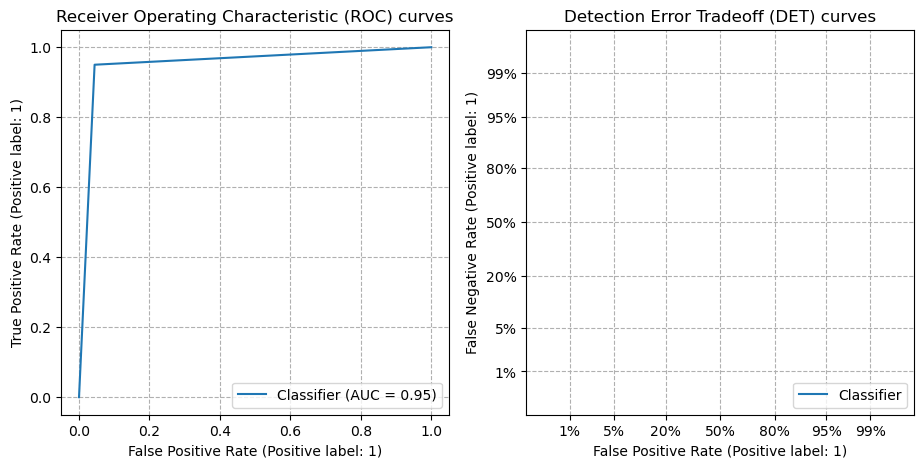

In [55]:
def plot_roc_eer(target, out):
    eer = compute_eer(target, out)
    print('Равная ошибка 1-го и 2-го рода (EER) = {:.3f}'.format(eer))
    
    # prepare plots
    fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))
    
    RocCurveDisplay.from_predictions(target,out,ax=ax_roc)
    DetCurveDisplay.from_predictions(target,out,ax=ax_det)
    
    ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
    ax_det.set_title("Detection Error Tradeoff (DET) curves")
    ax_det.grid(linestyle="--")
    ax_roc.grid(linestyle="--")
    
    plt.show()

plot_roc_eer(target, out)

Как видно из графиков, ROC-кривая не гладкая, а на DET-кривой вообще нет точек. Эта проблема связана с тем, что сеть выдает все значения либо около 0, либо около 1, не давая возможности нам плавно изменять порог принятия решения классификации и тем самым менять вероятности ошибок 1-го и 2-го рода.

<a name="end"></a> 
# 6. Проверка модели

Попробуем записать свой голос через микрофон и проверить, насколько хорошо работает модель с реальным аудио

In [61]:
# имя файла для записи
filename = "My_voice.wav"
# установить размер блока в 1024 сэмпла
chunk = 1024
# образец формата
FORMAT = pyaudio.paInt16
# моно, если хотите стерео измените на 2
channels = 1
# 44100 сэмплов в секунду
sample_rate = 44100
record_seconds = 4
# initialize PyAudio object
p = pyaudio.PyAudio()
# открыть объект потока как ввод и вывод
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Запись...")
for i in range(int(44100 / chunk * record_seconds)):
    data = stream.read(chunk)
    # если вы хотите слышать свой голос во время записи
    stream.write(data)
    frames.append(data)
print("Запись окончена.")
# остановить и закрыть поток
stream.stop_stream()
stream.close()
# завершить работу объекта pyaudio
p.terminate()
# сохранить аудиофайл
# открываем файл в режиме 'запись байтов'
wf = wave.open(filename, "wb")
# установить каналы
wf.setnchannels(channels)
# установить формат образца
wf.setsampwidth(p.get_sample_size(FORMAT))
# установить частоту дискретизации
wf.setframerate(sample_rate)
# записываем кадры как байты
wf.writeframes(b"".join(frames))
# закрыть файл
wf.close()

Запись...
Запись окончена.


In [62]:
IPython.display.Audio('My_voice.wav')

In [63]:
def predict(wavfile):#Зададим функцию для предсказания пола для отдельной аудиозаписи
    waveform, _ = librosa.load(wavfile, sr=16000)

    input = _timit_dataloader.preprocess_sample_inference(waveform)
    with torch.no_grad():
        out = model(torch.clone(input).detach().to(device))
        out = out.cpu().detach().numpy()
    print(out)
    out = 'женщины' if out < 0.5 else 'мужчины'
    return out

In [64]:
print(f"Звонок поступает от: {predict('My_voice.wav')}")

[0.9999783]
Звонок поступает от: мужчины


In [65]:
#сохраняем модель

filename = 'final_model.py'
pickle.dump(model, open(filename, 'wb'))